# Introduction

In this notebook we will make a brief study of Brazilian air traffic. In the following cells we will see graphs showing the network with all airports grouped by region, calculate the degree assortativity, see how many connected components exist in the network, simulate a trip passing throught one city of each region using the shortest path between then and finally we gonna calculate the clustering coefficient.  

# Importing packages

In [1]:
!pip install nxviz=='0.6.3'

In [2]:
import nxviz
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Filtering Brasil to Brasil flights

In [3]:
linkAirports = "https://raw.githubusercontent.com/alvarofpp/dataset-flights-brazil/main/data/airports.csv"
!wget --no-check-certificate "https://raw.githubusercontent.com/alvarofpp/dataset-flights-brazil/main/data/air_traffic.graphml"

airports = pd.read_csv(linkAirports, index_col="code")
G = nx.read_graphml("air_traffic.graphml")

--2021-12-02 14:45:23--  https://raw.githubusercontent.com/alvarofpp/dataset-flights-brazil/main/data/air_traffic.graphml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 999079 (976K) [text/plain]
Saving to: ‘air_traffic.graphml’

air_traffic.graphml 100%[===================>] 975.66K  --.-KB/s    in 0.04s   

2021-12-02 14:45:23 (24.0 MB/s) - ‘air_traffic.graphml’ saved [999079/999079]



In [4]:
airports.head()

,name,state,region,country,continent,Código OACI,lat_geo_point,lon_geo_point
code,,,,,,,,
KDFW,"DALLAS & FORT WORTH, TEXAS",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,NaN,32.896801,-97.038002
KJFK,"NEW YORK, NEW YORK",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,NaN,40.639801,-73.7789
KMIA,"MIAMI, FLORIDA",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,NaN,25.79319953918457,-80.29060363769531
SBCF,CONFINS,MG,SUDESTE,BRASIL,AMÉRICA DO SUL,NaN,-19.62444305419922,-43.97194290161133
SBGL,RIO DE JANEIRO,RJ,SUDESTE,BRASIL,AMÉRICA DO SUL,NaN,-22.8099994659,-43.2505569458


In [5]:
print("The network has {} nodes and {} edges".format(G.number_of_nodes(),
                                                     G.number_of_edges()))

The network has 1083 nodes and 9613 edges


In [6]:
G.nodes(data=True)

NodeDataView({'KDFW': {'name': 'DALLAS & FORT WORTH, TEXAS', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': '32.896801', 'longitude': '-97.038002'}, 'KJFK': {'name': 'NEW YORK, NEW YORK', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': '40.639801', 'longitude': '-73.7789'}, 'KMIA': {'name': 'MIAMI, FLORIDA', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': '25.79319953918457', 'longitude': '-80.29060363769531'}, 'SBCF': {'name': 'CONFINS', 'country': 'BRASIL', 'latitude': '-19.62444305419922', 'longitude': '-43.97194290161133'}, 'SBGL': {'name': 'RIO DE JANEIRO', 'country': 'BRASIL', 'latitude': '-22.8099994659', 'longitude': '-43.2505569458'}, 'SBGR': {'name': 'GUARULHOS', 'country': 'BRASIL', 'latitude': '-23.435556411743164', 'longitude': '-46.47305679321289'}, 'SGAS': {'name': 'ASUNCIÓN', 'country': 'PARAGUAI', 'latitude': '-25.239999771118164', 'longitude': '-57.52000045776367'}, 'SSUM': {'name': 'UMUARAMA', 'country': 'BRASIL', 'latitude': '-23.7987003326416', 'longit

In [7]:
# Selecting only flights in Brazil
br_traffic = list(node[0] for node in G.nodes(data=True) if node[1]["country"] == "BRASIL")
G_br = nx.subgraph(G, br_traffic)

print("The network has {} nodes and {} edges".format(G_br.number_of_nodes(),
                                                     G_br.number_of_edges()))

The network has 495 nodes and 4402 edges


In [8]:
# Setting node properties
for node in G_br.nodes(data=True):
  node[1]["state"] = airports.loc[node[0], "state"]
  node[1]["region"] = airports.loc[node[0], "region"]

G_br.nodes(data=True)

NodeDataView({'SBPO': {'name': 'PATO BRANCO', 'country': 'BRASIL', 'latitude': '-26.26893999999993', 'longitude': '-52.70661999999999', 'state': 'PR', 'region': 'SUL'}, 'SBMG': {'name': 'MARINGÁ', 'country': 'BRASIL', 'latitude': '-23.47606', 'longitude': '-52.016187', 'state': 'PR', 'region': 'SUL'}, 'SBGS': {'name': 'PONTA GROSSA', 'country': 'BRASIL', 'latitude': '-25.085599999999943', 'longitude': '-50.178699999999935', 'state': 'PR', 'region': 'SUL'}, 'SDCG': {'name': 'SÃO PAULO DE OLIVENÇA', 'country': 'BRASIL', 'latitude': '-3.46792950765', 'longitude': '-68.9204120636', 'state': 'AM', 'region': 'NORTE'}, 'SNJN': {'name': 'JANUÁRIA', 'country': 'BRASIL', 'latitude': '-15.473799705505371', 'longitude': '-44.385501861572266', 'state': 'MG', 'region': 'SUDESTE'}, 'SWDE': {'name': 'SÃO MIGUEL DO ARAGUAIA', 'country': 'BRASIL', 'latitude': '-12.822572', 'longitude': '-50.328188', 'state': 'GO', 'region': 'CENTRO-OESTE'}, 'SNMJ': {'name': 'MARACÁS', 'country': 'BRASIL', 'latitude': '-

# Assortativity

In [9]:
nx.attribute_assortativity_coefficient(G_br, "region")

0.36728130173582774

In [10]:
mapping = {"NORTE": 0, "NORDESTE": 1, "SUL": 2, "SUDESTE": 3, "CENTRO-OESTE": 4}
e = nx.attribute_mixing_matrix(G_br, "region", mapping=mapping)
e

array([[0.13584734, 0.02078601, 0.00726942, 0.02782826, 0.02226261],
       [0.02078601, 0.07882781, 0.01317583, 0.05599727, 0.01067697],
       [0.00726942, 0.01317583, 0.06905952, 0.04009541, 0.01226715],
       [0.02782826, 0.05599727, 0.04009541, 0.17446615, 0.03441617],
       [0.02226261, 0.01067697, 0.01226715, 0.03441617, 0.05224898]])

As we already know the attribute assortativity coefficient assumes values between -1 and 1. For values less than 0 the network is considered disassortative and assortative for values greater than 0. So we can conclude that the network is assortative, i.e network nodes tend to connect to nodes of the same type and we can see better above in the matrix how the nodes of each region relate. It looked like something like this, in this case the type of nodes are determined by the colors.

<img width="400" src="https://drive.google.com/uc?export=view&id=1NkaplsZvG9Qwxmz5rFYqnEFDjf6wqTk1">



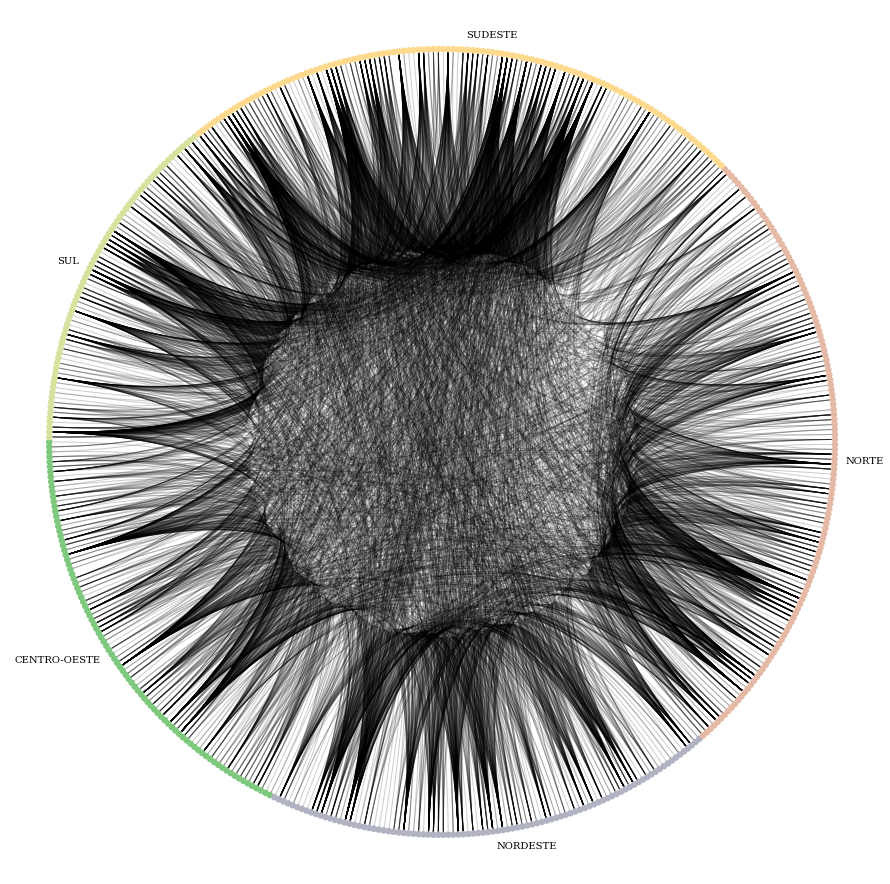

In [11]:
c = nxviz.CircosPlot(G_br,
                  node_color="region",
                  node_grouping="region",
                  node_order="region",
                  group_order="alphabetically",
                  group_legend=False,
                  node_labels=False,
                  group_label_position="middle",
                  group_label_color=False,figsize=(20,16))

c.draw()

plt.savefig("assortativity.png",
            format="png",
            dpi=400,
            bbox_inches="tight",
            transparent=True)
plt.show()

Note that just with the chart above it is difficult to say for sure which region has the highest number of flights departing and arriving in the same region and that region is southeast as we saw in the matrix above. Therefore, we can only affirm something with the mixing matrix presented in the cells above.

# Degree Assortativity

Next we observe how high-degree and low-degree nodes relate to other nodes. In the cell below, considering the network with all regions, according to the degree assortativity coefficient we conclude that the low-degree nodes have more links with high-degree nodes, i.e. the network is degree-disassortative.

In [12]:
nx.degree_assortativity_coefficient(G_br)

-0.2017097172979742

In [13]:
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G_br).items())

degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)
print(degree)
print(avg_neigh_degree)

[2, 52, 4, 6, 1, 44, 5, 11, 7, 83, 32, 66, 30, 3, 29, 25, 12, 8, 13, 10, 112, 36, 24, 85, 42, 19, 22, 15, 124, 97, 9, 14, 16, 21, 23, 48, 130, 56, 163, 28, 159, 20, 18, 127, 35, 46, 115, 0, 45, 79, 126, 119, 49, 34, 40, 17, 87, 62, 128, 84, 33, 102, 77, 96, 132, 72, 81, 61, 31, 59, 55, 92, 53, 41, 26, 137, 60, 167, 71, 89, 47, 39, 151, 50]
[74.48461538461538, 73.98076923076923, 69.80882352941177, 62.4537037037037, 114.35616438356165, 60.82575757575758, 63.99, 62.04895104895105, 65.97142857142858, 62.626506024096386, 74.74375, 64.89393939393939, 70.76666666666667, 71.74074074074075, 73.93103448275862, 93.38, 56.11904761904762, 65.08333333333333, 62.93706293706294, 55.85625, 48.035714285714285, 73.25, 69.45833333333333, 52.56470588235294, 78.91269841269842, 67.72631578947369, 85.54545454545455, 71.88571428571429, 48.88709677419355, 57.25773195876289, 64.05555555555556, 67.0, 71.4375, 77.68253968253968, 46.57608695652174, 72.45833333333333, 47.08461538461538, 75.41071428571429, 41.1717791

In the graph below we observe that as the degree of the node increases, the average of the degrees of the neighbors decreases.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


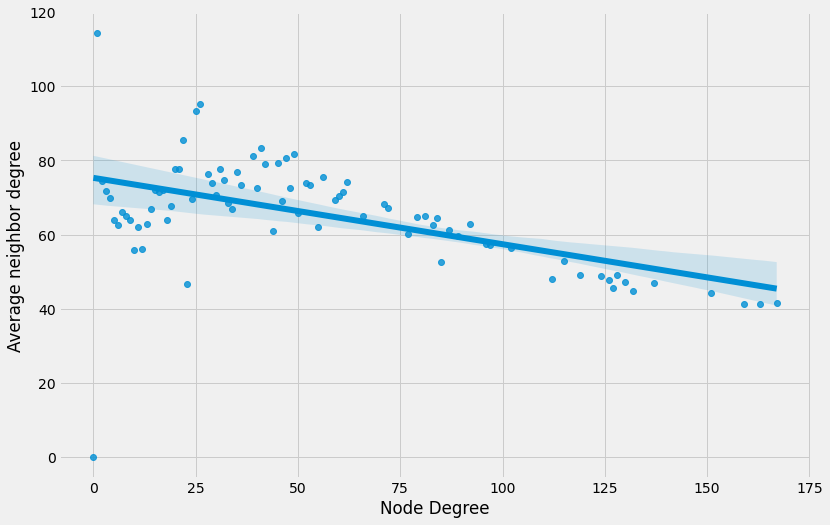

In [14]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree,avg_neigh_degree,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neighbor degree")

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.show()

Note below, that as all regions have negative a degree assortativity coefficient then the graphics are similar and the line accentuates negatively when the degree assortativity coefficient of the region is smaller.

## Norte

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


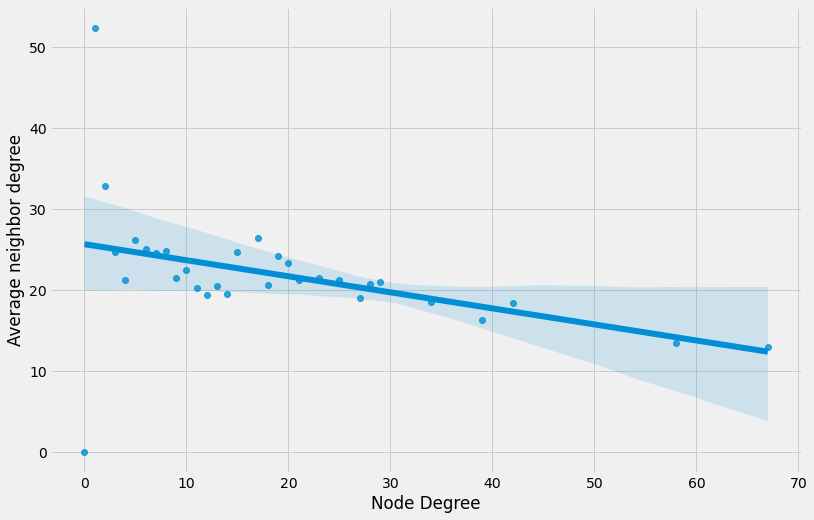

Degree assortativity coefficient: -0.22193985877089423


In [15]:
def regplotByRegion(G, region):
  aux_traffic = list(node[0] for node in G.nodes(data=True) if node[1]["region"] == region)
  G_aux = nx.subgraph(G, aux_traffic)

  degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G_aux).items())

  degree = list(degree)
  avg_neigh_degree = list(avg_neigh_degree)

  plt.style.use("fivethirtyeight")
  fig, ax = plt.subplots(1,1,figsize=(12,8))

  sns.regplot(degree,avg_neigh_degree,ax=ax)

  ax.set_xlabel("Node Degree")
  ax.set_ylabel("Average neighbor degree")

  # Save figure
  plt.savefig(region+"_degree_assortativity.png",
              format="png",
              dpi=400,
              bbox_inches="tight",
              transparent=True)
  plt.show()

  print("Degree assortativity coefficient:", nx.degree_assortativity_coefficient(G_aux))

regplotByRegion(G_br, "NORTE")

## Nordeste

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


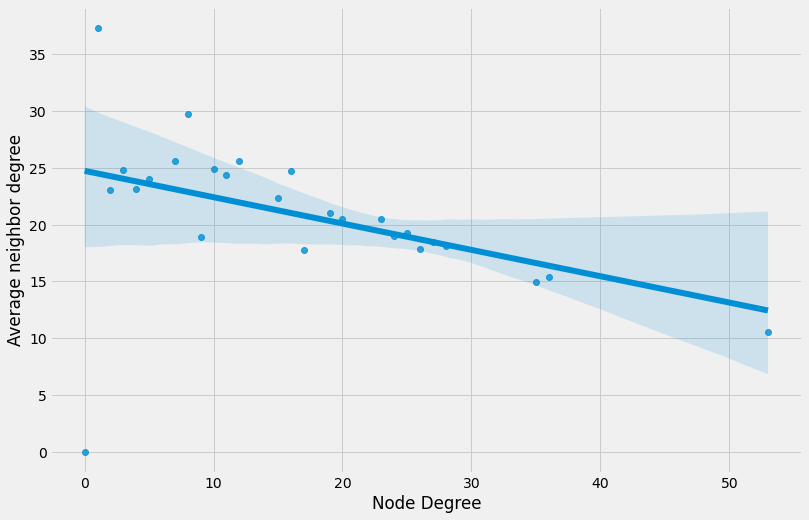

Degree assortativity coefficient: -0.33375735918340366


In [16]:
regplotByRegion(G_br, "NORDESTE")

## Sul

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


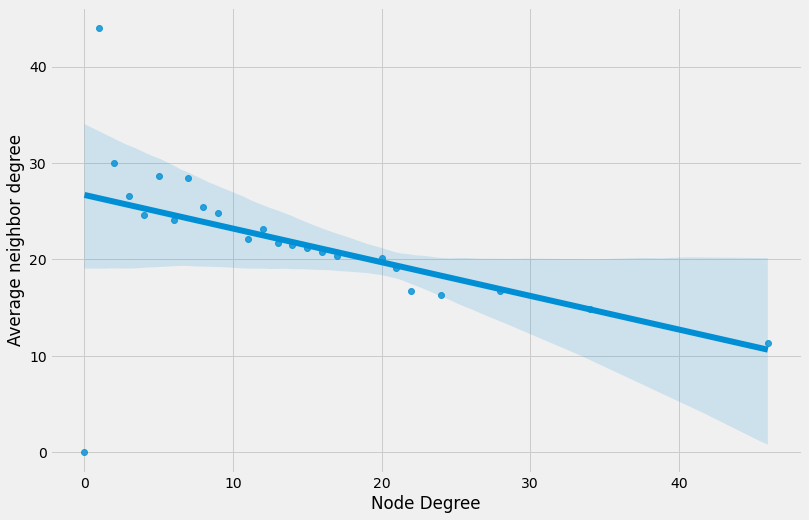

Degree assortativity coefficient: -0.40181381306857755


In [17]:
regplotByRegion(G_br, "SUL")

## Sudeste

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


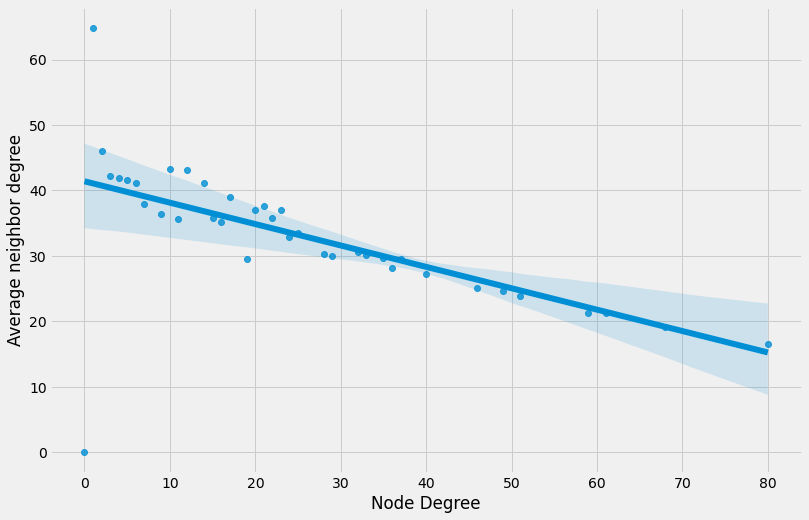

Degree assortativity coefficient: -0.3687746079424212


In [18]:
regplotByRegion(G_br, "SUDESTE")

## Centro-Oeste

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


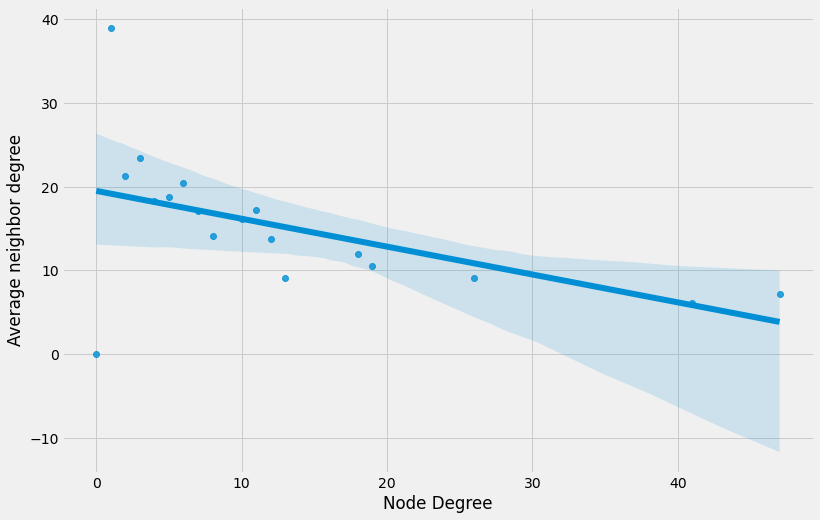

Degree assortativity coefficient: -0.3542839902086467


In [19]:
regplotByRegion(G_br, "CENTRO-OESTE")

Note that the southern region obtained the lowest degree assortactivity coefficient and is region with the highest grade nodes, that is, they are the nodes of the network with the highest number of connections where its neighbors have lower degrees.

#Connected Components

Let's see how many and who are the connected components of the Brazil air traffic network.

In [20]:
nx.number_connected_components(G_br)

5

In [21]:
for component in nx.connected_components(G_br):
  print(len(component), component)

491 {'SBPO', 'SBMG', 'SBGS', 'SDCG', 'SNJN', 'SWDE', 'SNMJ', 'SBJU', 'SNMX', 'SWBR', 'SNTO', 'SDUN', 'SBFL', 'SWJI', 'SNWR', 'SBMQ', 'SSTL', 'SSUV', 'SWPI', 'SNRB', 'SNGX', 'SBCB', 'SWMK', 'SWUI', 'SWFJ', '2NHT', 'SNPJ', 'SNUI', 'SBPK', 'SSBG', 'SNNU', 'SSAE', 'SWJW', 'SWOB', 'SBGP', 'SBSO', 'SWVR', 'SWNQ', 'SIGP', 'SWLF', 'SSUW', 'SBYA', 'SBBE', 'SDUB', 'SNRS', 'SNBW', 'SNPP', 'SNOB', 'SSOE', 'SBIH', 'SBRG', 'SNBU', 'SNML', 'SBMN', 'SDTK', 'SSZR', 'SNAP', 'SBYS', 'SNDT', 'SBNM', 'SBSN', 'SBSG', 'SBMM', 'SBDO', 'SBFN', 'SBCO', 'SSNC', 'SBPG', 'SJHG', 'SBRJ', 'SWCD', 'SBFZ', 'SNPX', 'SNSW', 'SBJA', 'SNJR', 'SBSM', 'SSGY', 'SBTV', 'SSPK', 'SBBG', 'SWYY', 'SBMC', 'SWGP', 'SWHP', 'SDAN', 'SBTG', 'SBMY', 'SNTP', 'SBIT', 'SNVB', 'SBCM', 'SWFX', 'SNUH', 'SDFR', 'SDJA', 'SSTE', 'SNLO', 'SJCW', 'SNBM', 'SBJR', 'SWFE', 'SNAT', 'SNJK', 'SJKB', 'SWNS', 'SBSV', 'SBCJ', 'SBTE', 'SBBT', 'SDWQ', 'SDBB', 'SSDO', 'SNVR', 'SBSP', 'SDAA', 'SBVH', 'SBBH', 'SBTR', 'SWNB', 'SJQK', 'SWEU', 'SWNA', 'SIZX', 'SN

Considering the number of nodes the entire network has and the number of nodes of each connected component, we can say that a little number of nodes are disconnected from our network. See below for information about these nodes.

In [22]:
airports.loc[["SBER", "SSBE", "SNGR", "SNBG"], :]

,name,state,region,country,continent,Código OACI,lat_geo_point,lon_geo_point
code,,,,,,,,
SBER,EIRUNEPÉ,AM,NORTE,BRASIL,AMÉRICA DO SUL,NaN,-6.663039999999967,-69.86730999999997
SSBE,CAMAPUÃ,MS,CENTRO-OESTE,BRASIL,AMÉRICA DO SUL,NaN,-19.598400115966797,-54.02109909057617
SNGR,CUMARU DO NORTE,PA,NORTE,BRASIL,AMÉRICA DO SUL,NaN,-7.783610820770264,-51.133888244628906
SNBG,BAIXO GUANDU,ES,SUDESTE,BRASIL,AMÉRICA DO SUL,NaN,-19.499000549316406,-41.04180145263672


Now let´s see what is the percentage of each region in the component that this calculation is meaningful.

In [23]:
G_componente1 =  nx.subgraph(G_br, list(nx.connected_components(G_br))[0])

norte = [node for node in G_componente1.nodes(data=True) if node[1]["region"] == "NORTE"]
nordeste = [node for node in G_componente1.nodes(data=True) if node[1]["region"] == "NORDESTE"]
sul = [node for node in G_componente1.nodes(data=True) if node[1]["region"] == "SUL"]
sudeste = [node for node in G_componente1.nodes(data=True) if node[1]["region"] == "SUDESTE"]
centro = [node for node in G_componente1.nodes(data=True) if node[1]["region"] == "CENTRO-OESTE"]

print("Norte: %0.4f" % (len(norte)/G_componente1.number_of_nodes()*100))
print("Nordeste: %0.4f" % (len(nordeste)/G_componente1.number_of_nodes()*100))
print("Sul: %0.4f" % (len(sul)/G_componente1.number_of_nodes()*100))
print("Sudeste: %0.4f" % (len(sudeste)/G_componente1.number_of_nodes()*100))
print("Centro-Oeste: %0.4f" % (len(centro)/G_componente1.number_of_nodes()*100))

Norte: 25.6619
Nordeste: 18.7373
Sul: 14.2566
Sudeste: 23.4216
Centro-Oeste: 17.9226


In the cell above we can see precisely the percentage of each region and conclude that there are more nodes from the north and southeast regions, this corresponds to what we saw in the assortativity chart.

# Shortest Paths

Now let´s simulate a trip passing through each region. We will pass through the cities listed in the cell below.

In [24]:
airports.loc[["SBBE", "SBMH", "SBSG", "SWJW", "SDAM"], :]

,name,state,region,country,continent,Código OACI,lat_geo_point,lon_geo_point
code,,,,,,,,
SBBE,BELÉM,PA,NORTE,BRASIL,AMÉRICA DO SUL,NaN,-1.3792500495900002,-48.4762992859
SBMH,MARINGÁ,PR,SUL,BRASIL,AMÉRICA DO SUL,NaN,-23.431076500820804,-51.907866075205526
SBSG,SÃO GONÇALO DO AMARANTE,RN,NORDESTE,BRASIL,AMÉRICA DO SUL,NaN,-5.768056,-35.376111
SWJW,JATAÍ,GO,CENTRO-OESTE,BRASIL,AMÉRICA DO SUL,NaN,-17.8299007416,-51.7729988098
SDAM,CAMPINAS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,NaN,-22.85919952392578,-47.10820007324219


Note that although the cities of Belém and Maringá are not from adjacent regions, it was possible to travel from one to another on only one flight

In [25]:
# Belém - Maringá
nx.shortest_path(G_br, "SBBE", "SBMH")

['SBBE', 'SBMH']

Below we see that to travel from Maringá in the south to São Gonçalo do Amarante in the northeast we had to go through one city on the Southeast.

In [26]:
# Maringá - SÃO GONÇALO DO AMARANTE
nx.shortest_path(G_br, "SBMH", "SBSG")

['SBMH', 'SBGL', 'SBSG']

In [27]:
airports.loc["SBGL", :]

name             RIO DE JANEIRO
state                        RJ
region                  SUDESTE
country                  BRASIL
continent        AMÉRICA DO SUL
Código OACI                 NaN
lat_geo_point    -22.8099994659
lon_geo_point    -43.2505569458
Name: SBGL, dtype: object

Now in the cells below traveling from the Northeast to the Midwest, we had to go through Belo Horizonte in the Southeast. And traveling from the Midwest to Campinas in the Southeast we pass again by the same city.

In [28]:
# SÃO GONÇALO DO AMARANTE - Jataí
nx.shortest_path(G_br, "SBSG", "SWJW")

['SBSG', 'SBBH', 'SWJW']

In [29]:
# Jataí - Campinas
nx.shortest_path(G_br, "SWJW", "SDAM")

['SWJW', 'SBBH', 'SDAM']

In [30]:
airports.loc["SBBH", :]

name                  BELO HORIZONTE
state                             MG
region                       SUDESTE
country                       BRASIL
continent             AMÉRICA DO SUL
Código OACI                      NaN
lat_geo_point    -19.851200103759766
lon_geo_point    -43.950599670410156
Name: SBBH, dtype: object

Although we need to go through a few cities to go from one region to another, we observed that even the last city being in the Southeast we passed through Belo Horizonte in the same Region.

# Clustering

By calculating the clustering coefficient of the network in general, we can conclude that the network topology approaches a complete network, because we get a value close to 1. If the obtained value were close to 0 the network would have a star topology.

In [31]:
nx.average_clustering(G_br)

0.6230508002369359

Note below that there are nodes with star topology with respect to their neighbors and there are also nodes with clustering equal to 1.

In [32]:
nx.clustering(G, ["SNAB", "SBAC"])

{'SBAC': 1.0, 'SNAB': 0}

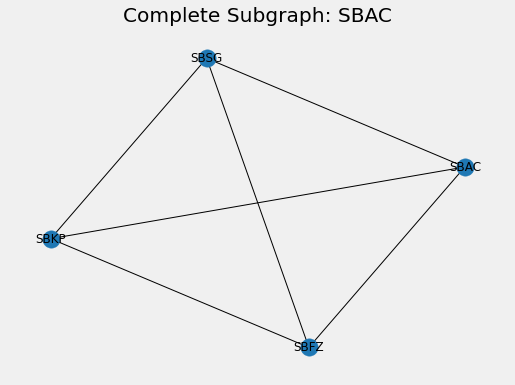

In [33]:
starNodes = [node for node in nx.neighbors(G, "SBAC")]
starNodes.append("SBAC")
G_star = nx.subgraph(G, list(starNodes))

fig, plot = plt.subplots(1, 1,figsize=(8,6))

nx.draw_networkx(G_star, pos=nx.spring_layout(G_star), ax=plot)
plot.set_title("Complete Subgraph: SBAC")
plot.axis("off")
plt.show()

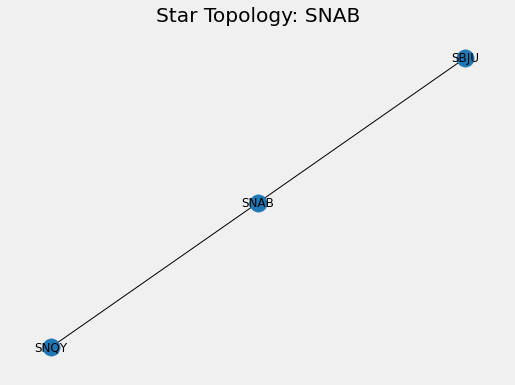

In [34]:
starNodes = [node for node in nx.neighbors(G, "SNAB")]
starNodes.append("SNAB")
G_star = nx.subgraph(G, list(starNodes))

fig, plot = plt.subplots(1, 1,figsize=(8,6))

nx.draw_networkx(G_star, pos=nx.spring_layout(G_star), ax=plot)
plot.set_title("Star Topology: SNAB")
plot.axis("off")
plt.show()

Now let's select the subgraphs of each region.

In [35]:
n_traffic = list(node[0] for node in G_br.nodes(data=True) if node[1]["region"] == "NORTE")
G_n = nx.subgraph(G_br, n_traffic)

print("The network has {} nodes and {} edges".format(G_n.number_of_nodes(),
                                                     G_n.number_of_edges()))

The network has 128 nodes and 598 edges


In [36]:
nd_traffic = list(node[0] for node in G_br.nodes(data=True) if node[1]["region"] == "NORDESTE")
G_nd = nx.subgraph(G_br, nd_traffic)

print("The network has {} nodes and {} edges".format(G_nd.number_of_nodes(),
                                                     G_nd.number_of_edges()))

The network has 92 nodes and 347 edges


In [37]:
s_traffic = list(node[0] for node in G_br.nodes(data=True) if node[1]["region"] == "SUL")
G_s = nx.subgraph(G_br, s_traffic)

print("The network has {} nodes and {} edges".format(G_s.number_of_nodes(),
                                                     G_s.number_of_edges()))

The network has 70 nodes and 304 edges


In [38]:
sd_traffic = list(node[0] for node in G_br.nodes(data=True) if node[1]["region"] == "SUDESTE")
G_sd = nx.subgraph(G_br, sd_traffic)

print("The network has {} nodes and {} edges".format(G_sd.number_of_nodes(),
                                                     G_sd.number_of_edges()))

The network has 116 nodes and 768 edges


In [39]:
co_traffic = list(node[0] for node in G_br.nodes(data=True) if node[1]["region"] == "CENTRO-OESTE")
G_co = nx.subgraph(G_br, co_traffic)

print("The network has {} nodes and {} edges".format(G_co.number_of_nodes(),
                                                     G_co.number_of_edges()))

The network has 89 nodes and 230 edges


Note that the northeast region obtained the lowest coefficient, this indicates that air traffic approaches a star topology, that is, this indicates that there are central nodes with neighbors that do not connect to each other.

In [40]:
nx.average_clustering(G_n)

0.6159653188854738

In [41]:
nx.average_clustering(G_nd)

0.43807384418290296

In [42]:
nx.average_clustering(G_s)

0.5979416718387064

In [43]:
nx.average_clustering(G_sd)

0.6186700538769273

In [44]:
nx.average_clustering(G_co)

0.561877235886007